# Apps Data Analysis 

## Data exploring

In this project the data from different apps on the Google Play Store and the AppStore is analyzed

In [1]:
open_apple=open('AppleStore.csv', encoding='utf8')
from csv import reader
read_file = reader(open_apple)
apple_dataset = list(read_file)
apple_header=apple_dataset[0]
apple_data=apple_dataset[1:]

In [2]:
open_google=open('googleplaystore.csv', encoding='utf8')
from csv import reader
read_google = reader(open_google)
google_dataset = list(read_google)
google_header=google_dataset[0]
google_data=google_dataset[1:]

In [3]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice=dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n') #this adds a new empty line after each row
        
    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns', len(dataset[0]))
        

We display a few rows of each data to have a better understanding on how our data is structured

With the `explore_data()` fucntion we return the size of the dataset (rows x columns)

In [4]:
# Data from the Google Play Store
print("Sample of data from Google Play Store \n")
print(google_header)
print('\n')
explore_data(google_data, 0, 1, True)
print('\n')

#Data from the AppStore
print("Sample of data from AppStore \n")
print(apple_header)
print('\n')
explore_data(apple_data, 0, 1, True)

Sample of data from Google Play Store 

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


Number of rows: 10841
Number of columns 13


Sample of data from AppStore 

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


Number of rows: 7197
Number of columns 16


So far we know the Google Play dataset contains information on 10841 apps stored in 13 columns

The AppStore dataset contains information on 7197 apps stored in 16 columns

A more detailed explanation of the information contained on each column can be found below:

[Google Play Store]('https://www.kaggle.com/datasets/lava18/google-play-store-apps')

[AppStore]('https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps')

## Data cleaning 

### Google Play Store

In [5]:
print(google_data[10472])  # incorrect row
print('\n')
print(google_header)  # header
print('\n')
print(google_data[0])

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


In [6]:
print(len(google_data))
del(google_data[10472]) #important to not run this more than once
print(len(google_data))

10841
10840


Upon closer data inspection, it can be seen that different rows display the same app name on the `'App'` column

Below we show an example for the `Instagram` app

In [7]:
for app in google_data:
    name=app[0]
    if name == str('Instagram'):
        print (app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


There are 4 different instances in which the name `Instagram` is the name of the app. We must delete the repeated rows, but before we do that, lets check if there are further instances of repeated app names. 

In [8]:
name_dictionary={}
counter=-1
delete_rows_google=[]
for app in google_data:
    name=app[0]
    counter+=1
    if name in name_dictionary:
        name_dictionary[name]+=1
        delete_rows_google.append(counter)
        
    else:
        name_dictionary[name]=1
        
# command for converting a dictionary to list
list_of_name_dictionary=list(map(list,name_dictionary.items()))

print(list_of_name_dictionary[0:20])

[['Photo Editor & Candy Camera & Grid & ScrapBook', 1], ['Coloring book moana', 2], ['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 1], ['Sketch - Draw & Paint', 1], ['Pixel Draw - Number Art Coloring Book', 1], ['Paper flowers instructions', 1], ['Smoke Effect Photo Maker - Smoke Editor', 1], ['Infinite Painter', 1], ['Garden Coloring Book', 1], ['Kids Paint Free - Drawing Fun', 1], ['Text on Photo - Fonteee', 1], ['Name Art Photo Editor - Focus n Filters', 1], ['Tattoo Name On My Photo Editor', 1], ['Mandala Coloring Book', 1], ['3D Color Pixel by Number - Sandbox Art Coloring', 1], ['Learn To Draw Kawaii Characters', 1], ['Photo Designer - Write your name with shapes', 1], ['350 Diy Room Decor Ideas', 1], ['FlipaClip - Cartoon animation', 1], ['ibis Paint X', 1]]


Above we have a fragment of apps list along with the amount of times repeated in the google dataset, while below we have the row number of the instances that we will go through.
It is rather a quite lenghty list, lets represent this data in a more easy to visualize way.

In [9]:
print('This is a truncated list of the rows that must be deleted \n', delete_rows_google[0:20], '...truncated')

print('The number of repeated apps in the Google Play Store is', (len(delete_rows_google)))

This is a truncated list of the rows that must be deleted 
 [229, 236, 239, 256, 261, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279] ...truncated
The number of repeated apps in the Google Play Store is 1181


As we can see above, there is a total of `1881` amount of rows with repeated data from our `google_data` dataset that pose a conflict.

In [10]:
list_of_repeated_names=[]
list_of_repeated_names_count=[]
new_dictionary={}
for row in list_of_name_dictionary:
    count = row[1]
    name  = row[0]
    if count > 1:
        
        list_of_repeated_names.append(name)
        list_of_repeated_names_count.append(count)

new_list = []
for item in list_of_repeated_names_count:
    new_list.append(str(item))

#print(new_list)

new_dictionary={}

for row in new_list:
    if row in new_dictionary:
        new_dictionary[row]+=1
    else:
        new_dictionary[row]=1

We display the results of the number of apps vs the amount of times that are repeated in the following bar graphic.

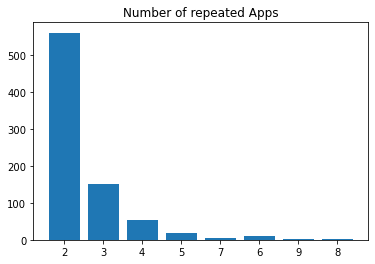

In [13]:
#bar plot commands
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.bar(range(len(new_dictionary)), list(new_dictionary.values()), align='center')
plt.xticks(range(len(new_dictionary)), list(new_dictionary.keys()))
plt.title("Number of repeated Apps")
plt.show()

Seems like there are plenty of rows that need to be deleted, but before that lets check if the same happens with the `apple_data` dataset. 

### AppStore

We follow a similar procedure than that used on the `google_data` dataset. 
Since the number of repeated apps in this last dataset is small, there is no need to represent the data. 

In [14]:

name_dictionary_apple={}
delete_rows=[]
counter=-1
for app in apple_data:
    name=app[1]
    counter+=1
    if name in name_dictionary_apple:
        name_dictionary_apple[name]+=1
        delete_rows.append(counter)
    else:
        name_dictionary_apple[name]=1
        
# command for converting a dictionary to list
list_of_name_dictionary_apple=list(map(list,name_dictionary_apple.items()))


list_of_repeated_names=[]
list_of_repeated_names_count=[]
new_dictionary={}
for row in list_of_name_dictionary_apple:
    count = row[1]
    name  = row[0]
    if count > 1:
        
        list_of_repeated_names.append(name)
        list_of_repeated_names_count.append(count)
        
print(list_of_repeated_names)
print(delete_rows)

['Mannequin Challenge', 'VR Roller Coaster']
[4463, 4831]


Which means that the only two rows that need to be deleted are `4463` and `4831`

## Deleting data

### Google Play Store

In [15]:
unique_apps_google=[]
duplicated_apps_google=[]

for row in google_data:
    name=row[0]
    if name in unique_apps_google:
        duplicated_apps_google.append(name)
    else:
        unique_apps_google.append(name)

print('The number of unique apps on Google Play Store is',len(unique_apps_google)) 
print('The number of duplicated apps on Google Play Store is',len(duplicated_apps_google))

The number of unique apps on Google Play Store is 9659
The number of duplicated apps on Google Play Store is 1181


In [16]:
max_reviews={}
# 3 is the index for the number of reviews
for row in google_data:
    name=row[0]
    reviews_number=row[3]
    if name in max_reviews and reviews_number > max_reviews[name]:
        max_reviews[name]=reviews_number
    elif name not in max_reviews:
        max_reviews[name]=reviews_number
        
len(max_reviews)  

9659

In a previous code cell, we found that there are 1,181 cases where an app occurs more than once, so the length of our dictionary (of unique apps) should be equal to the difference between the length of our data set and 1,181.

In [17]:
print('Expected length:', len(google_data) - 1181)
print('Actual length:', len(max_reviews))

Expected length: 9659
Actual length: 9659


In [18]:
google_data

[['Photo Editor & Candy Camera & Grid & ScrapBook',
  'ART_AND_DESIGN',
  '4.1',
  '159',
  '19M',
  '10,000+',
  'Free',
  '0',
  'Everyone',
  'Art & Design',
  'January 7, 2018',
  '1.0.0',
  '4.0.3 and up'],
 ['Coloring book moana',
  'ART_AND_DESIGN',
  '3.9',
  '967',
  '14M',
  '500,000+',
  'Free',
  '0',
  'Everyone',
  'Art & Design;Pretend Play',
  'January 15, 2018',
  '2.0.0',
  '4.0.3 and up'],
 ['U Launcher Lite – FREE Live Cool Themes, Hide Apps',
  'ART_AND_DESIGN',
  '4.7',
  '87510',
  '8.7M',
  '5,000,000+',
  'Free',
  '0',
  'Everyone',
  'Art & Design',
  'August 1, 2018',
  '1.2.4',
  '4.0.3 and up'],
 ['Sketch - Draw & Paint',
  'ART_AND_DESIGN',
  '4.5',
  '215644',
  '25M',
  '50,000,000+',
  'Free',
  '0',
  'Teen',
  'Art & Design',
  'June 8, 2018',
  'Varies with device',
  '4.2 and up'],
 ['Pixel Draw - Number Art Coloring Book',
  'ART_AND_DESIGN',
  '4.3',
  '967',
  '2.8M',
  '100,000+',
  'Free',
  '0',
  'Everyone',
  'Art & Design;Creativity',
  'J

## Converting the list of lists to a dataframe and further data cleaning

While a list of list data structure offers a more easy way to modify data as well as being able to store data of different nested sizes, pandas is better for handling data in large data structures.

In [25]:
import pandas as pd
import numpy as np
googlestore_df = pd.DataFrame(google_data, columns = ['App', 'Category',"Rating","Reviews","Size","Installs","Type", "Price", "Content Rating", "Genres", "Last Updated","Current Ver", "Android Ver"])

In [26]:
googlestore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


We are having some of the unwanted columns which will be of not much use in the analysis process. So let’s drop those columns.

In [28]:
googlestore_df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [40]:
googlestore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10840 non-null  object
 1   Category        10840 non-null  object
 2   Rating          10840 non-null  object
 3   Reviews         10840 non-null  int32 
 4   Size            10840 non-null  object
 5   Installs        10840 non-null  object
 6   Type            10840 non-null  object
 7   Price           10840 non-null  object
 8   Content Rating  10840 non-null  object
 9   Genres          10840 non-null  object
dtypes: int32(1), object(9)
memory usage: 804.7+ KB


All the columns have the null_count as zero, which indicates that now the data frame doesn’t contain any missing values.

Columns like Reviews, Size, Installs, & priceshould have an intor floatdatatype, But here we can see of objecttype, So let’s convert them to their respective correct type.

In [29]:
googlestore_df['Reviews'] = googlestore_df.Reviews.astype(int)

Now, the ``reviews`` column has been converted to int type, so now we can move to the Column: ``Size``.
Converting the ``Size`` Column from object to integer, but this column contains some of the special characters like , , + , M , K & also it has a some of the value as Varies with device . We need to remove all of these and then convert it to int or float .

Removing the ``+`` Symbol:

In [42]:
googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.strip('+'))# Removing the + Sign

Removing the ``,`` symbol:

In [43]:
googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.replace(',', ''))# For removing the `,`

Replacing the ``M `` symbol by multiplying the value with 1000000:

In [45]:
googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.replace('M', 'e+6'))# For converting the M to Mega

Replacing the ``k`` by multiplying the value with 1000:

In [46]:
googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kilo

Replacing the Varies with device value with ``Nan`` :

In [50]:
googlestore_df['Size'] = googlestore_df.Size.replace('Varies with device', np.NaN)

Now, finally converting all these values to numeric type:

In [51]:
googlestore_df['Size'] = pd.to_numeric(googlestore_df['Size']) # Converting the string to Numeric type

Since we converted the ``Varies with device`` value to ``NaN`` , so we have to do something with those set of ``NaN`` values data. It will be a better idea to drop the Rows of the column ``Size`` having ``NaN`` values because it will be not an efficient idea to replace those values with mean or mode since the size of some apps would be too large and some of them too small.

In [54]:
googlestore_df.dropna(subset = ['Size'], inplace=True)

Column: ``Installs`` :
To convert this column from object to integer type. First of all, we will need to remove the ``+`` symbol from these values.

In [55]:
googlestore_df['Installs'] = googlestore_df.Installs.apply(lambda x: x.strip('+'))

and then let’s remove the ``,`` symbol from the numbers.

In [56]:
googlestore_df['Installs'] = googlestore_df.Installs.apply(lambda x: x.replace(',', ''))

Lastly, we can now convert it from string type to numeric type, and then have a look at our dataset.

In [57]:
googlestore_df['Installs'] = pd.to_numeric(googlestore_df['Installs'])

So, now we are only left with the ``Price`` column.
Column: ``Price`` :
Converting this column from object to Numeric type.

In [58]:
googlestore_df['Price'].value_counts()

0          8421
$0.99       145
$2.99       114
$1.99        66
$4.99        65
           ... 
$3.08         1
$30.99        1
$15.46        1
$379.99       1
$1.59         1
Name: Price, Length: 87, dtype: int64

In [59]:
googlestore_df['Price'] = googlestore_df.Price.apply(lambda x: x.strip('$'))

googlestore_df['Price'] = pd.to_numeric(googlestore_df['Price'])

In [60]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [61]:
y = googlestore_df['Category'].value_counts().index
x = googlestore_df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

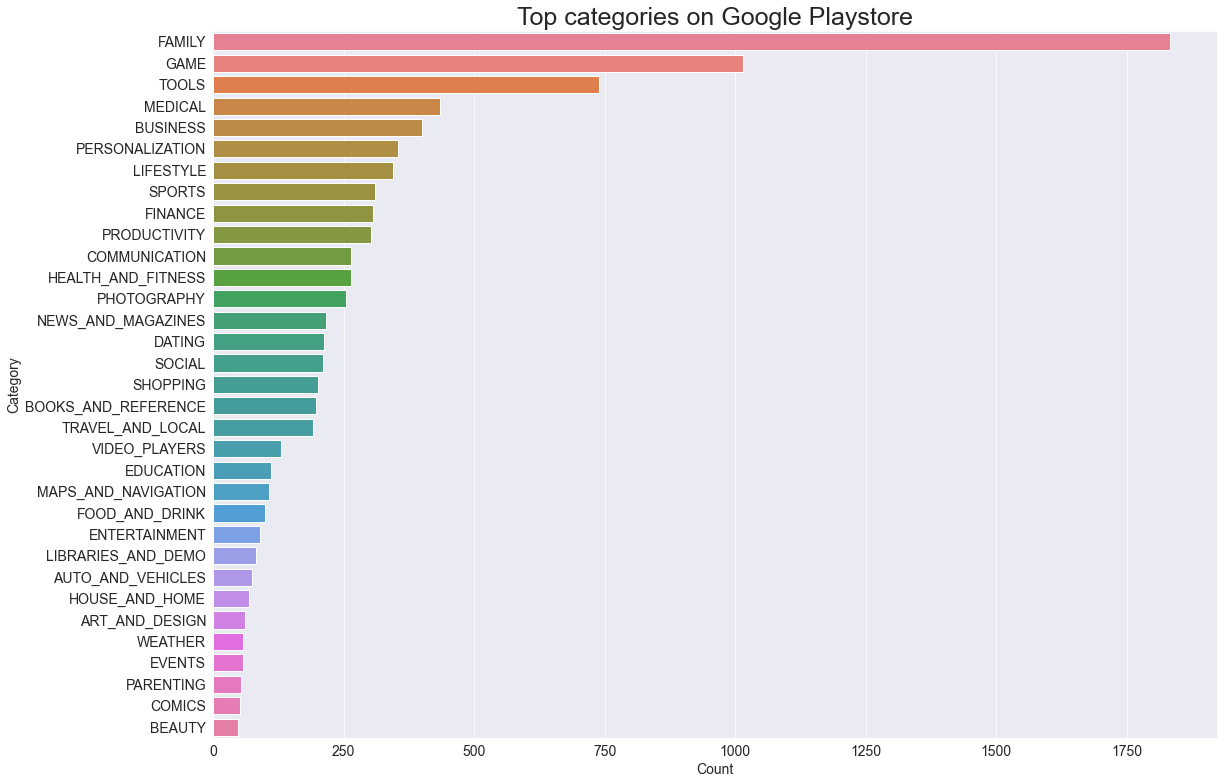

In [62]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

So there are all total of 33 categories in the dataset from the above output we can come to the conclusion that in the play store most of the apps are under Family & Game category and least are of Beauty & Comics Category.

### Which category of Apps from the ‘Content Rating’ column is found more on the play store?

In [63]:
x2 = googlestore_df['Content Rating'].value_counts().index
y2 = googlestore_df['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

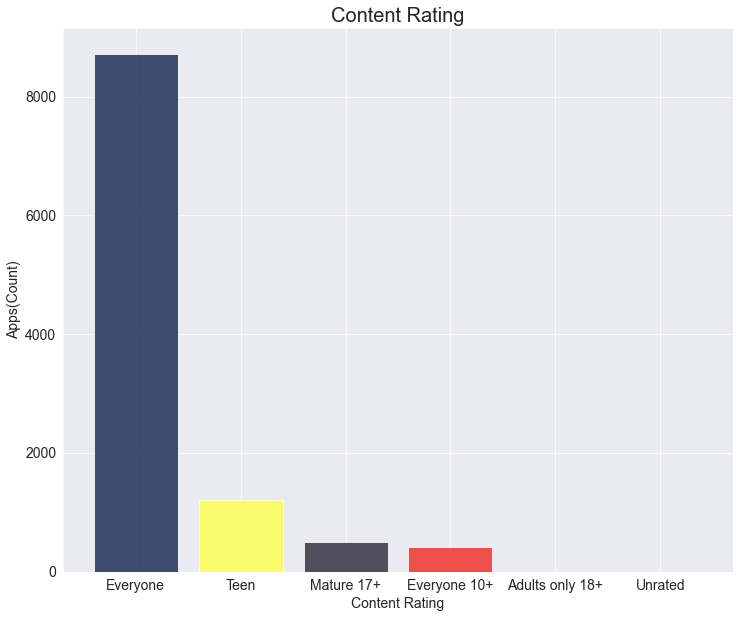

In [34]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

From the above plot, we can see that the Everyone category has the highest number of apps.

Let’s have a look at the distribution of the ratings of the data frame.

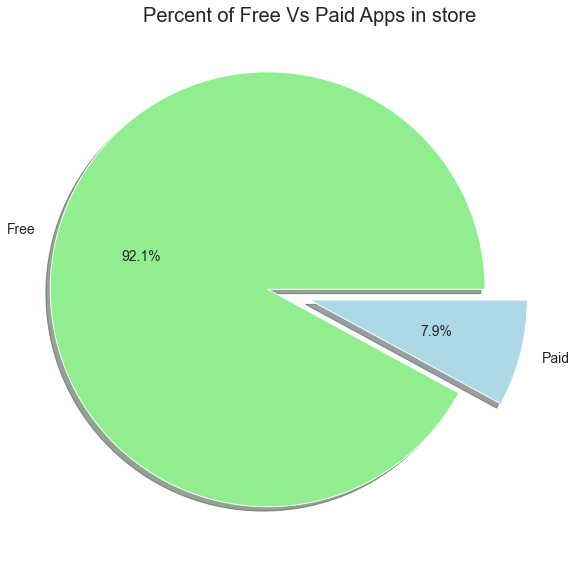

In [82]:
plt.figure(figsize=(10,10))
labels = googlestore_df['Type'].value_counts(sort = True).index
sizes = googlestore_df['Type'].value_counts(sort = True)
colors = ["lightgreen","lightblue"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

### What are the count of Apps in different genres?

In [74]:
topAppsinGenres = googlestore_df['Genres'].value_counts().head(50)

In [75]:
x3sis = []
y3sis = []

for i in range(len(topAppsinGenres)):
    x3sis.append(topAppsinGenres.index[i])
    y3sis.append(topAppsinGenres[i])

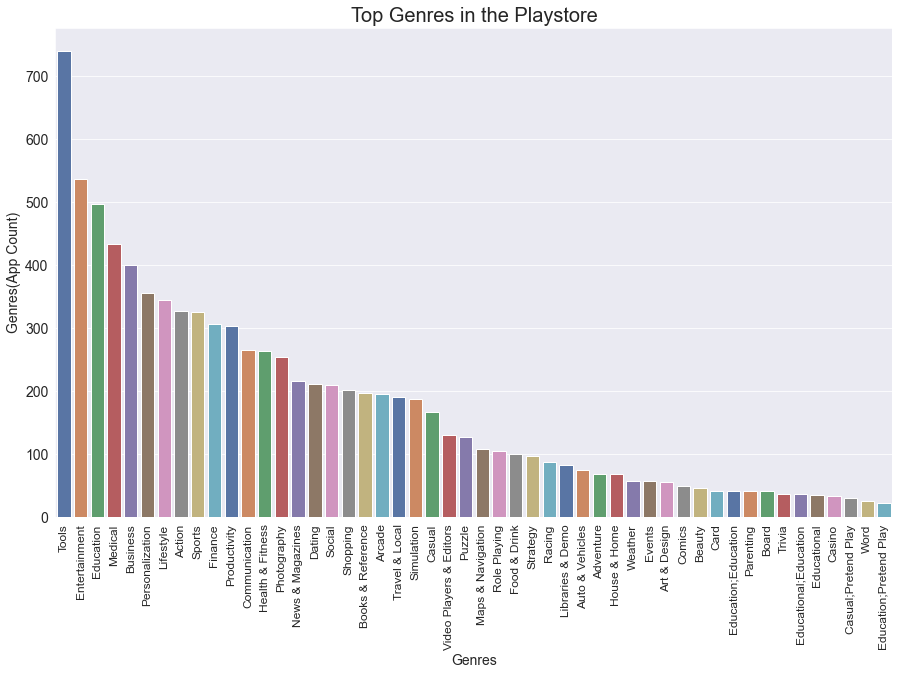

In [76]:
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

In [77]:
Paid_Apps_df = googlestore_df[googlestore_df['Type'] == 'Paid']
earning_df = Paid_Apps_df[['App', 'Installs', 'Price']]
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price'];
earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)

<ipython-input-77-ee6014063d7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price'];


C:\Users\pizza\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pizza\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


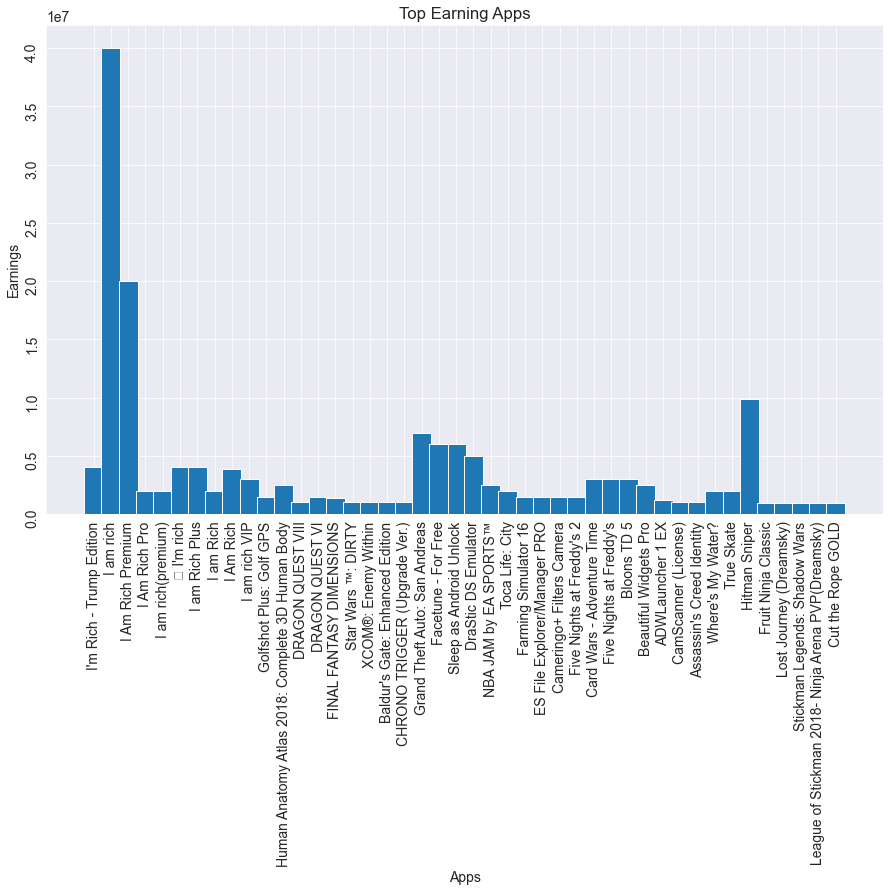

In [78]:
# PLot a bar chart of earning at y and app names at x
plt.figure(figsize=(15,9))
plt.bar(earning_df_sorted_by_Price.App, earning_df_sorted_by_Price.Earnings, width=1.1, label=earning_df_sorted_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");